In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [133]:
df = pd.read_csv('drive/MyDrive/ml_files/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [134]:
df_num = pd.DataFrame()
for col in df.columns:
  if df[col].dtypes == object:
    df_num[col] = df [col].astype('category').cat.codes
  else:
    df_num[col] = df[col]
df_num.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [135]:
df_num.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [136]:
X = df_num.drop(['Drug'], axis = 1)
y = df_num['Drug']

In [137]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int8

In [138]:
new_y = pd.DataFrame()
for index, row in y.iteritems():
  new_y.loc[index, [0, 1, 2, 3, 4]] = [int(row==0),int(row==1),int(row==2),int(row==3),int(row==4)]

<ipython-input-138-837a164214bb>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in y.iteritems():


In [139]:
new_y.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


In [140]:
import keras
from keras import layers
from sklearn.model_selection import train_test_split

In [141]:
model = keras.Sequential()
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [142]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.20)

In [146]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 5ms/step - loss: 17.1428 - accuracy: 0.4563
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 15.5066 - accuracy: 0.4563
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 14.3437 - accuracy: 0.4563
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 13.3195 - accuracy: 0.4563
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 12.3272 - accuracy: 0.4563
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 11.3595 - accuracy: 0.4563
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 10.4096 - accuracy: 0.4563
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 9.4559 - accuracy: 0.4563
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 8.5013 - accuracy: 0.4563
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 7.5583 - accuracy: 0.4563


In [147]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (32, 5)                   30        
                                                                 
 dense_21 (Dense)            (32, 5)                   30        
                                                                 
 dense_22 (Dense)            (32, 5)                   30        
                                                                 
Total params: 90 (360.00 Byte)
Trainable params: 90 (360.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'loss: {loss}, accuracy: {accuracy}')

2/2 [==============================] - 0s 11ms/step - loss: 8.3383 - accuracy: 0.4500
loss: 8.338299751281738, accuracy: 0.44999998807907104


In [151]:
import matplotlib.pyplot as plt
import gdown
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import random
from matplotlib.image import imread
from PIL import Image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as image

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score, confusion_matrix


image_df =  pd.read_csv("drive/MyDrive/ml_files/lab3/sports.csv")

In [83]:
image_df

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train
...,...,...,...,...
14488,99,valid/wingsuit flying/1.jpg,wingsuit flying,valid
14489,99,valid/wingsuit flying/2.jpg,wingsuit flying,valid
14490,99,valid/wingsuit flying/3.jpg,wingsuit flying,valid
14491,99,valid/wingsuit flying/4.jpg,wingsuit flying,valid


In [82]:
print(f"Total number of target classes : {len(image_df.labels.unique())}")

Total number of target classes : 100


In [88]:
labels_to_keep = ['archery', 'baseball', 'bmx', 'polo', 'skydiving']

image_df = image_df[image_df['labels'].isin(labels_to_keep)]

image_df

,class id,filepaths,labels,data set


In [85]:
print(f"Total number of target classes : {len(image_df.labels.unique())}")

Total number of target classes : 5


In [97]:
dataset = {
             "train_data" : "drive/MyDrive/ml_files/lab3/train",
             "valid_data" : "drive/MyDrive/ml_files/lab3/valid",
             "test_data" : "drive/MyDrive/ml_files/lab3/test"
          }

all_data = []
for path in dataset.values():
    data = {"imgpath": [] , "labels": [] }
    category = os.listdir(path)
    for folder in category:
        folderpath = os.path.join(path , folder)
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)


    all_data.append(data.copy())
    data.clear()



train_df = pd.DataFrame(all_data[0] , index=range(len(all_data[0]['imgpath'])))
valid_df = pd.DataFrame(all_data[1] , index=range(len(all_data[1]['imgpath'])))
test_df = pd.DataFrame(all_data[2] , index=range(len(all_data[2]['imgpath'])))


lb = LabelEncoder()
train_df['encoded_labels'] = lb.fit_transform(train_df['labels'])
valid_df['encoded_labels'] = lb.fit_transform(valid_df['labels'])
test_df['encoded_labels'] = lb.fit_transform(test_df['labels'])

In [98]:
valid_df = valid_df[valid_df['labels'].isin(labels_to_keep)]
train_df = train_df[train_df['labels'].isin(labels_to_keep)]
test_df = test_df[test_df['labels'].isin(labels_to_keep)]

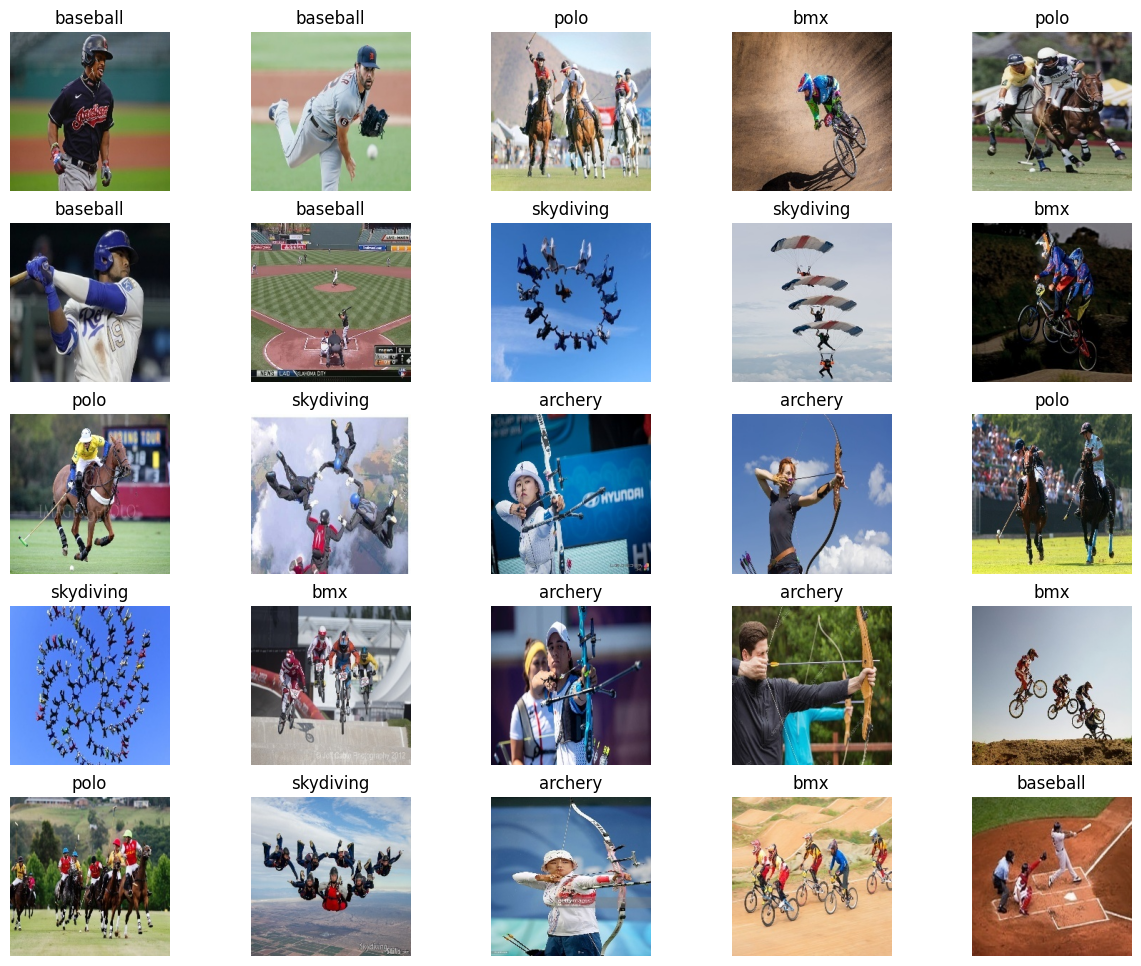

In [99]:
plt.figure(figsize=(15,12))
for i, row in valid_df.sample(n=25).reset_index().iterrows():
    plt.subplot(5,5,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [100]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision



BATCH_SIZE = 10
IMAGE_SIZE = (224, 224)


generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

valid_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 751 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.


In [101]:
pretrained_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False, # we don`t need a pre-trained top layer (output layer)
    weights='imagenet',
    pooling='max'
)

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [102]:
num_classes = len(set(train_images.classes))


# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
], name='AugmentationLayer')



inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(350)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x) # mixed_precision need separated Dense and Activation layers
model = Model(inputs=inputs, outputs=outputs)



model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 dense_13 (Dense)            (None, 350)               448350    
                                                                 
 activation (Activation)     (None, 350)               0         
                                                                 
 batch_normalization (Batch  (None, 350)               1400  

In [104]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=valid_images,
    validation_steps=len(valid_images),
    epochs=10,
    callbacks=[
        EarlyStopping(monitor = "val_loss",
                               patience = 3,
                               restore_best_weights = True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)

Epoch 1/10
76/76 [==============================] - 152s 2s/step - loss: 0.2232 - accuracy: 0.9201 - val_loss: 0.0040 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 2/10
76/76 [==============================] - 59s 773ms/step - loss: 0.1064 - accuracy: 0.9734 - val_loss: 0.0088 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 3/10
76/76 [==============================] - 62s 811ms/step - loss: 0.1139 - accuracy: 0.9561 - val_loss: 0.0159 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 4/10
76/76 [==============================] - 59s 782ms/step - loss: 0.0952 - accuracy: 0.9667 - val_loss: 0.0025 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/10
76/76 [==============================] - 62s 806ms/step - loss: 0.0734 - accuracy: 0.9747 - val_loss: 0.0024 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/10
76/76 [==============================] - 60s 791ms/step - loss: 0.0709 - accuracy: 0.9760 - val_loss: 0.0032 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/10
76/76 [========================

In [105]:
results = model.evaluate(test_images, verbose=0)

print("Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.2f}%".format(results[1] * 100))

Loss: 0.05594
Accuracy: 96.00%


In [3]:
import numpy as np
import keras
from keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [79]:
df = pd.read_csv('drive/MyDrive/ml_files/threads_reviews.csv', usecols=['review_description', 'rating'])
df.head()

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,2
1,Pretty good for a first launch!! Its easy to u...,3
2,"For a brand new app, it's very well optimized....",3
3,"Great app with a lot of potential! However, th...",3
4,"The app is good, but it needs a lot of functio...",3


In [80]:
score_to_word_map = {
    1: 0,
    2: 0,
    3: 1,
    4: 2,
    5: 2,
}
# 0 - bad, 1 - ok, 2 - good
df['rating'] = df['rating'].apply(lambda x: score_to_word_map[x])
df.head()

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,0
1,Pretty good for a first launch!! Its easy to u...,1
2,"For a brand new app, it's very well optimized....",1
3,"Great app with a lot of potential! However, th...",1
4,"The app is good, but it needs a lot of functio...",1


In [81]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
def text_preprocessing(text: str):
  text = text.lower()
  text = re.sub("#\S+", " ", text)
  text = re.sub("\d", " ", text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\s{2,}', " ", text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
df['review_description'] = df['review_description'].apply(lambda x: text_preprocessing(x))
df

,review_description,rating
0,meh greatest experience chromebook seems custo...,0
1,pretty good first launch easy use self explana...,1
2,brand new app well optimized however missing q...,1
3,great app lot potential however lot needs fixe...,1
4,app good needs lot functionality example searc...,1
...,...,...
32905,killed dog mark zuckerburg strangled dog gone,0
32906,add search hashtag like twitter,0
32907,bad twister,0
32908,yet another trash meta,0


In [10]:
lists = df['review_description'].str.split()
unique_count = len(set(lists.sum()))

In [84]:
unique_count

22263

In [86]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=unique_count, filters='')
tokenizer.fit_on_texts(df['review_description'])

In [87]:
df['review_description'] = tokenizer.texts_to_sequences(df['review_description'])

In [88]:
df['review_description']

0        [900, 1626, 46, 5545, 150, 4369, 1023, 2454, 3...
1        [151, 3, 37, 411, 87, 12, 1338, 8103, 172, 223...
2        [809, 16, 1, 76, 1339, 268, 203, 384, 35, 61, ...
3        [14, 1, 73, 242, 268, 73, 48, 265, 877, 32, 82...
4        [1, 3, 48, 73, 601, 877, 712, 1088, 148, 105, ...
                               ...                        
32905                   [2539, 3500, 75, 5197, 3500, 1056]
32906                                 [31, 104, 463, 5, 2]
32907                                           [39, 6921]
32908                                   [179, 94, 277, 42]
32909                                  [99, 623, 1, 23, 2]
Name: review_description, Length: 32910, dtype: object

In [89]:
X = df.drop(['rating'], axis = 1)
y = df['rating']

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [91]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2757761 (10.52 MB)
Trainable params: 2757761 

In [55]:
# X_train['review_description'] = X_train['review_description'].to_numpy()
# X_val['review_description'] = X_val['review_description'].to_numpy()

In [92]:
# np.array(X_train, dtype=object)

array([[list([49, 1385, 345, 2266, 13153])],
       [list([160, 296, 1880, 1976, 18703, 18704, 1169, 18705, 4272, 18706])],
       [list([3, 1])],
       ...,
       [list([1811, 90, 5101, 1, 1811, 2449, 1])],
       [list([24, 132, 141])],
       [list([36, 39, 87, 143, 467, 4, 1919, 243, 195, 439, 84, 549, 135, 21624, 26])]],
      dtype=object)

In [110]:
for index, row in X_train.iterrows():
  row['review_description'] = pd.Series(row['review_description'])

<ipython-input-110-ead72277cf46>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  row['review_description'] = pd.Series(row['review_description'])


In [100]:
# X_train.loc[0]

review_description    [900, 1626, 46, 5545, 150, 4369, 1023, 2454, 3...
Name: 0, dtype: object

In [117]:
X_train['review_description']

14945                         [49, 1385, 345, 2266, 13153]
26249    [160, 296, 1880, 1976, 18703, 18704, 1169, 187...
28150                                               [3, 1]
14946                                    [517, 644, 3, 52]
30027                                                 [33]
                               ...                        
31927                                 [333, 199, 2899, 84]
16014                                        [15, 53, 108]
19867                   [1811, 90, 5101, 1, 1811, 2449, 1]
16566                                       [24, 132, 141]
31190    [36, 39, 87, 143, 467, 4, 1919, 243, 195, 439,...
Name: review_description, Length: 19746, dtype: object

In [118]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_val, y_val), verbose=1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).